# 📘 M2C2 DataKit Notebook: Universal Loading, Assurance, and Scoring

This notebook demonstrates a full analytic pipeline using the `m2c2-datakit` package. It uses the `LASSIE` class to load, validate, score, and optionally export data from multiple source types.

---

## 🎯 Purpose

Enable researchers to plug in data from varied sources (e.g., MongoDB, UAS, MetricWire, CSV bundles) and apply a consistent pipeline for:

- Input validation

- Scoring via predefined rules

- Inspection and summarization

- Tidy export and codebook generation

---

## Inspired by:

<img src="https://m.media-amazon.com/images/M/MV5BNDNkZDk0ODktYjc0My00MzY4LWE3NzgtNjU5NmMzZDA3YTA1XkEyXkFqcGc@._V1_FMjpg_UX1000_.jpg" alt="Inspiration for Package, Lassie Movie" width="100"/>

## 🧠 L.A.S.S.I.E. Pipeline Summary

| Step | Method           | Purpose                                                                 |
|------|------------------|-------------------------------------------------------------------------|
| L    | `load()`         | Load raw data from a supported source (e.g., MongoDB, UAS, MetricWire). |
| A    | `assure()`       | Validate that required columns exist before processing.                 |
| S    | `score()`        | Apply scoring logic based on predefined or custom rules.                |
| S    | `summarize()`    | Aggregate scored data by participant, session, or custom groups.        |
| I    | `inspect()`      | Visualize distributions or pairwise plots for quality checks.           |
| E    | `export()`       | Save scored and summarized data to tidy files and optionally metadata.  |

---


## 📦 Supported Sources

You may have used M2C2kit tasks via our various integrations, including the ones listed below. Each integration has its own loader class, which is responsible for reading the data and converting it into a format that can be processed by the `m2c2_datakit` package. Keep in mind that you are responsible for ensuring that the data is in the correct format for each loader class.

In the future we anticipate creating loaders for downloading data via API.

| Source Type   | Loader Class          | Key Arguments                            | Notes                                 |
|---------------|------------------------|-------------------------------------------|----------------------------------------|
| `mongodb`     | `MongoDBImporter`      | `source_path` (URL, to JSON)                      | Expects flat or nested JSON documents. |
| `multicsv`    | `MultiCSVImporter`     | `source_map` (dict of CSV paths)          | Each activity type is its own file.    |
| `metricwire`  | `MetricWireImporter`   | `source_path` (glob pattern or default)   | Processes JSON files from unzipped export. |
| `qualtrics`    | `QualtricsImporter`     | `source_path` (URL to CSV)         | Each activity's trial saves data to a new column.    |
| `uas`         | `UASImporter`          | `source_path` (URL, to pseudo-JSON)                       | Parses newline-delimited JSON.         |


---

## 🚀 Example Pipeline Steps

### Step 1: Load Data

```python
source_map = {
    "Symbol Search": "data/reboot/m2c2kit_manualmerge_symbol_search_all_ts-20250402_151939.csv",
    "Grid Memory": "data/reboot/m2c2kit_manualmerge_grid_memory_all_ts-20250402_151940.csv"
}

mcsv = m2c2.core.pipeline.LASSIE().load(source_name="multicsv", source_map=source_map)
mw = m2c2.core.pipeline.LASSIE().load(source_name="metricwire", source_path="data/metricwire/unzipped/*/*/*.json")
mdb = m2c2.core.pipeline.LASSIE().load(source_name="mongodb", source_path="data/production-mongo-export/data_exported_120424_1010am.json")
uas = m2c2.core.pipeline.LASSIE().load(source_name="UAS", source_path= "https://uas.usc.edu/survey/uas/m2c2_ess/admin/export_m2c2.php?k=<INSERT KEY HERE>")
```

---

### Step 2: Verify Data

```python
mcsv.assure(required_columns=m2c2.core.config.settings.STANDARD_GROUPING_FOR_AGGREGATION)
mw.assure(required_columns=m2c2.core.config.settings.STANDARD_GROUPING_FOR_AGGREGATION_METRICWIRE)
mdb.assure(required_columns=m2c2.core.config.settings.STANDARD_GROUPING_FOR_AGGREGATION)
uas.assure(required_columns=m2c2.core.config.settings.STANDARD_GROUPING_FOR_AGGREGATION)
```
---

### Step 3: Score Data

```python
mcsv.score()
mw.score()
mdb.score()
uas.score()
```

### Step 4: Inspect Data

```python
mcsv.inspect()
mw.inspect()
mdb.inspect()
uas.inspect()
```
---

### Step 5: Summarize Data

```python
mcsv.summarize(grouping=m2c2.core.config.settings.STANDARD_GROUPING_FOR_AGGREGATION)
mw.summarize(grouping=m2c2.core.config.settings.STANDARD_GROUPING_FOR_AGGREGATION_METRICWIRE)
mdb.summarize(grouping=m2c2.core.config.settings.STANDARD_GROUPING_FOR_AGGREGATION)
uas.summarize(grouping=m2c2.core.config.settings.STANDARD_GROUPING_FOR_AGGREGATION)
```

---

### Step 6: Export Data

```python
output_folder = "tidy
mcsv.export(file_basename="uas_export", directory=output_folder)
mw.export(file_basename="metricwire", directory=output_folder)
mdb.export(file_basename="mongodb_export", directory=output_folder)
uas.export(file_basename="uas_export", directory=output_folder)

```

#### Oh yeah, and export the codebook too!

```python
mcsv.export_codebook(filename="codebook_uas.md", directory=output_folder)
mw.export_codebook(filename="codebook_metricwire.md", directory=output_folder)
mdb.export_codebook(filename="codebook_mongo.md", directory=output_folder)
uas.export_codebook(filename="codebook_uas.md", directory=output_folder)
```

## Verify Data

## 🛠️ Setup for Developers of this Package

In [ ]:
!make clean
!make dev-install

## Setup Environment to run Notebook

In [1]:
import os
import re
import glob
import json
import pandas as pd
from dotenv import load_dotenv
import m2c2_datakit as m2c2

In [2]:
m2c2.core.utils.get_filename_timestamp()
output_folder = "tidy"

In [3]:
# Define source_folder relative to current working directory
source_folder_mw = os.path.abspath(os.path.join(os.pardir, 'datakit/data/metricwire/unzipped'))
source_path_mw = f"{source_folder_mw}/*/*/*.json"

source_folder_mdb = os.path.abspath(os.path.join(os.pardir, "datakit/data/production-mongo-export"))
source_path_mdb = f"{source_folder_mdb}/data_exported_120424_1010am.json"

source_folder_qualtrics = os.path.abspath(os.path.join(os.pardir, "datakit/data/qualtrics"))
source_path_qualtrics = f"{source_folder_qualtrics}/Qualtrics+QSF+M2C2Kit+-+Grid+Memory+&+Color+Shapes_April+17,+2025_18.05.csv"

## Run Tests

In [4]:
# Data from Metricwire
mw = m2c2.core.pipeline.LASSIE().load(source_name="metricwire", source_path=source_path_mw)
mw.assure(required_columns=m2c2.core.config.settings.STANDARD_GROUPING_FOR_AGGREGATION_METRICWIRE)
mw_scored = mw.score()
#mw.inspect()
mw.export(file_basename="export_metricwire", directory=output_folder)
mw.export_codebook(filename="codebook_metricwire.md", directory=output_folder)
mw.whats_inside()

[WARN] No scoring functions defined for activity 'Color Shapes', skipping.
[EXPORT] DataFrame exported to: tidy/export_metricwire_scored.csv
[EXPORT] DataFrame exported to: tidy/export_metricwire_scored.json
Metadata saved to tidy/export_metricwire_metadata.json
🧠 LASSIE Instance Overview:
{'activities_loaded': True,
 'errors': None,
 'flat_loaded': True,
 'flat_scored': True,
 'flat_scored_shape': (42, 47),
 'flat_shape': (58, 38),
 'grouped_loaded': True,
 'grouped_scored': True,
 'grouped_summary': False,
 'grouped_summary_shape': None,
 'n_grouped_scored': 2,
 'n_groups': 3,
 'scoring_func_map_loaded': True,
 'source_name': 'metricwire',
 'source_path': '/Users/nur375/Documents/GitHub/datakit/data/metricwire/unzipped/*/*/*.json',
 'timestamp': '20250514_081803',
 'validated': True}


/var/folders/s5/cdfgl21s67g7kcj9ts4x8pnn4njnsy/T/ipykernel_74789/3986678396.py:2: LogfireNotConfiguredWarning: No logs or spans will be created until `logfire.configure()` has been called. Set the environment variable LOGFIRE_IGNORE_NO_CONFIG=1 or add ignore_no_config=true in pyproject.toml to suppress this warning.
  mw = m2c2.core.pipeline.LASSIE().load(source_name="metricwire", source_path=source_path_mw)


{'timestamp': '20250514_081803',
 'source_name': 'metricwire',
 'source_path': '/Users/nur375/Documents/GitHub/datakit/data/metricwire/unzipped/*/*/*.json',
 'flat_loaded': True,
 'flat_shape': (58, 38),
 'grouped_loaded': True,
 'n_groups': 3,
 'flat_scored': True,
 'flat_scored_shape': (42, 47),
 'grouped_scored': True,
 'n_grouped_scored': 2,
 'grouped_summary': False,
 'grouped_summary_shape': None,
 'scoring_func_map_loaded': True,
 'activities_loaded': True,
 'validated': True,
 'errors': None}

In [5]:
# Data from demo M2C2 study on PSU production server
mdb = m2c2.core.pipeline.LASSIE().load(source_name="mongodb", source_path=source_path_mdb)
mdb.assure(required_columns=m2c2.core.config.settings.STANDARD_GROUPING_FOR_AGGREGATION)
mdb.score()
#mdb.inspect()
mdb.export(file_basename="export_mongodb", directory=output_folder)
mdb.export_codebook(filename="codebook_mongo.md", directory=output_folder)
mdb.whats_inside()

[WARN] No scoring functions defined for activity 'Color Dots', skipping.
[WARN] No scoring functions defined for activity 'Color Match', skipping.
[WARN] No scoring functions defined for activity 'Color Shapes', skipping.
[WARN] No scoring functions defined for activity 'Color Squares', skipping.
[WARN] No scoring functions defined for activity 'Digit Span', skipping.
[WARN] No scoring functions defined for activity 'Digit Span (Audio)', skipping.
[WARN] No scoring functions defined for activity 'Drawing', skipping.
[WARN] No scoring functions defined for activity 'Face Naming Task', skipping.
[WARN] No scoring functions defined for activity 'Go No Go', skipping.
[WARN] No scoring functions defined for activity 'Go No Go Fade', skipping.
[WARN] No scoring functions defined for activity 'Grid Forage', skipping.
[WARN] No scoring functions defined for activity 'JOLO', skipping.
[WARN] No scoring functions defined for activity 'Motion', skipping.
[WARN] No scoring functions defined for ac

{'timestamp': '20250514_081808',
 'source_name': 'mongodb',
 'source_path': '/Users/nur375/Documents/GitHub/datakit/data/production-mongo-export/data_exported_120424_1010am.json',
 'flat_loaded': True,
 'flat_shape': (2546, 27),
 'grouped_loaded': True,
 'n_groups': 20,
 'flat_scored': True,
 'flat_scored_shape': (96, 40),
 'grouped_scored': True,
 'n_grouped_scored': 2,
 'grouped_summary': False,
 'grouped_summary_shape': None,
 'scoring_func_map_loaded': True,
 'activities_loaded': True,
 'validated': True,
 'errors': None}

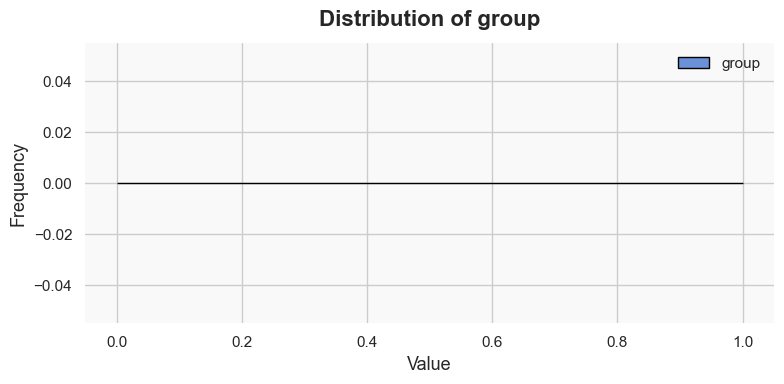

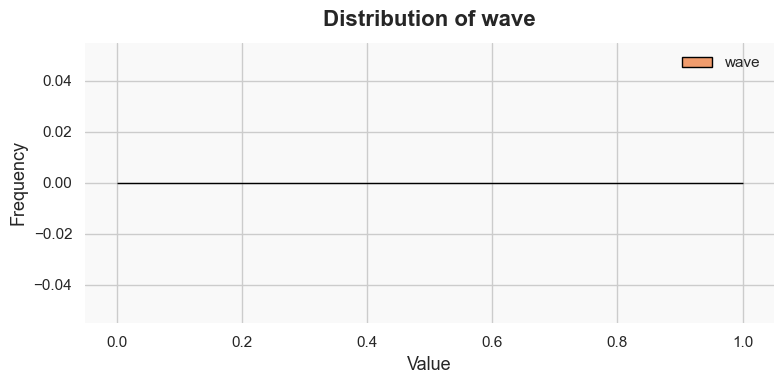

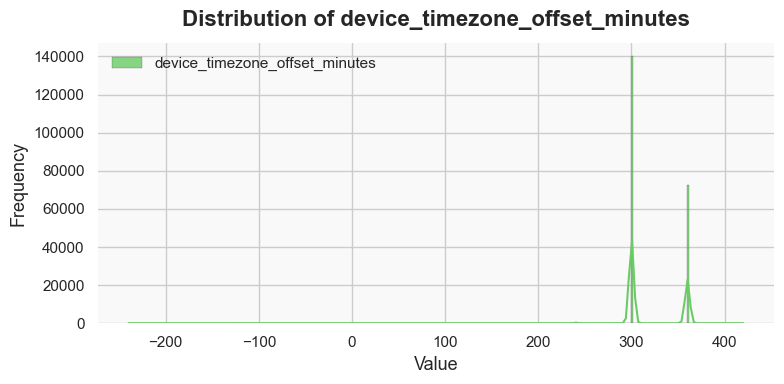

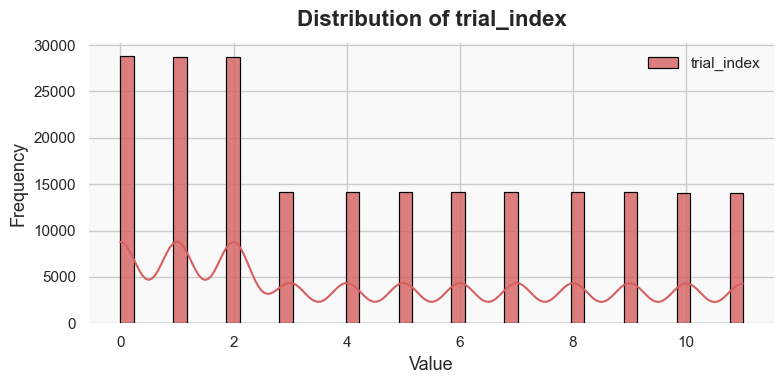

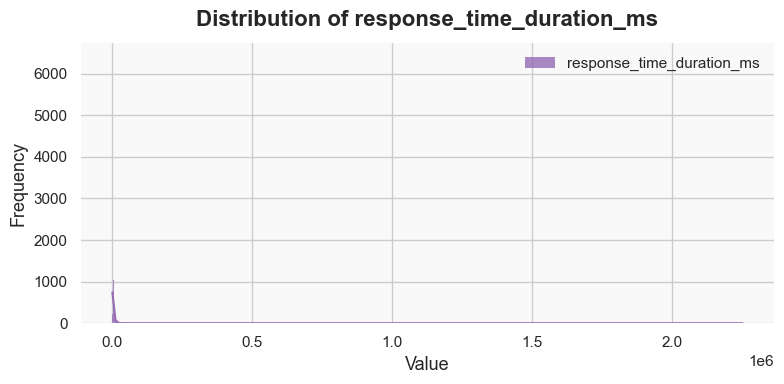

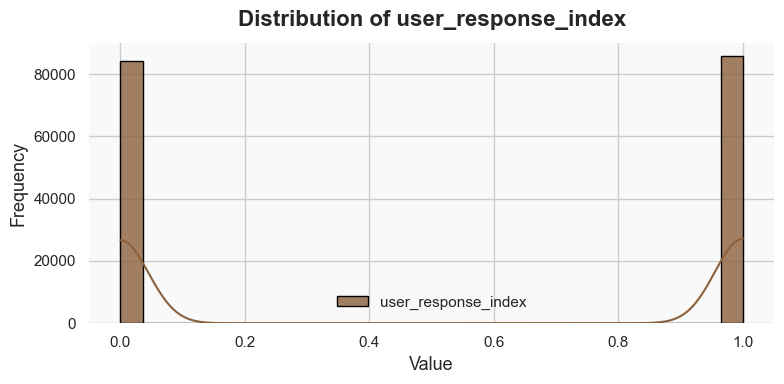

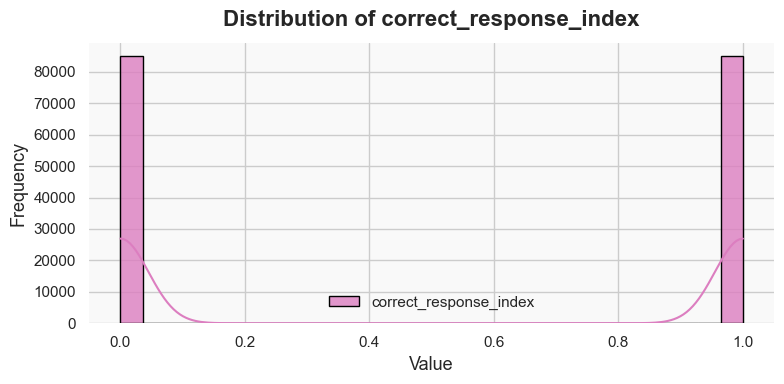

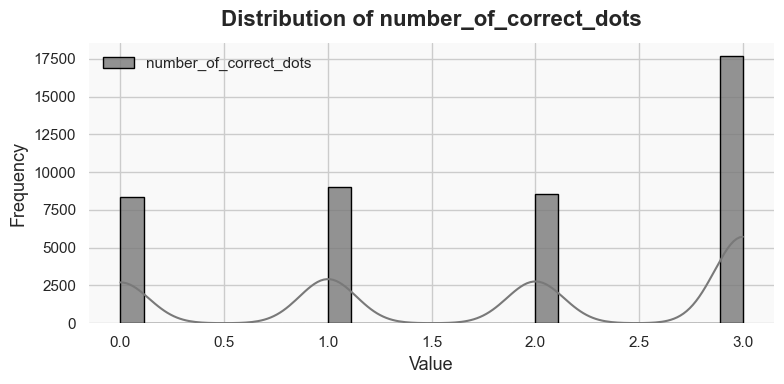

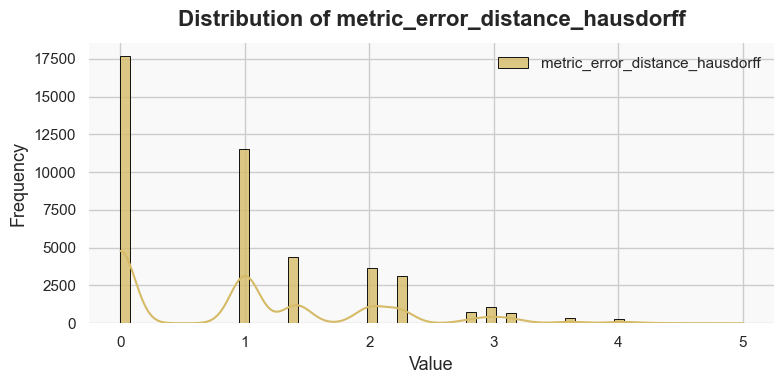

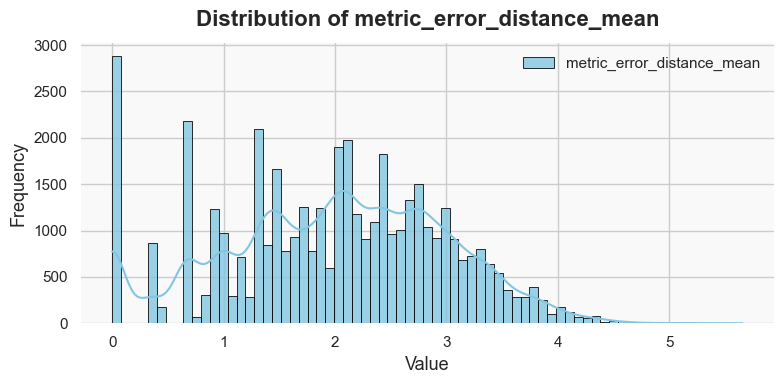

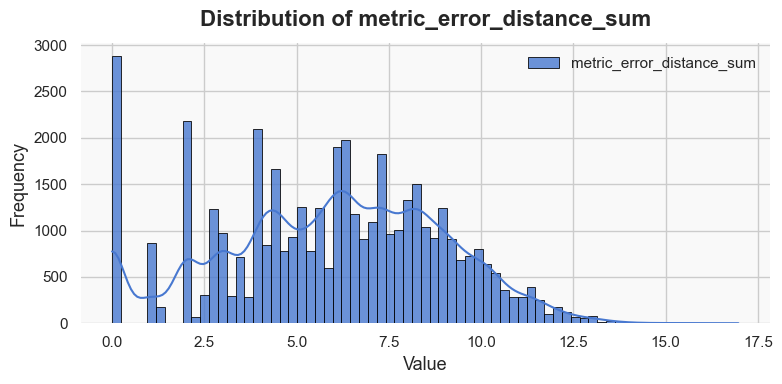

[EXPORT] DataFrame exported to: tidy/export_multicsv_scored.csv
[EXPORT] DataFrame exported to: tidy/export_multicsv_scored.json
Metadata saved to tidy/export_multicsv_metadata.json
🧠 LASSIE Instance Overview:
{'activities_loaded': True,
 'errors': None,
 'flat_loaded': True,
 'flat_scored': True,
 'flat_scored_shape': (213580, 38),
 'flat_shape': (213580, 29),
 'grouped_loaded': True,
 'grouped_scored': True,
 'grouped_summary': False,
 'grouped_summary_shape': None,
 'n_grouped_scored': 2,
 'n_groups': 2,
 'scoring_func_map_loaded': True,
 'source_name': 'multicsv',
 'source_path': None,
 'timestamp': '20250514_081902',
 'validated': True}


{'timestamp': '20250514_081902',
 'source_name': 'multicsv',
 'source_path': None,
 'flat_loaded': True,
 'flat_shape': (213580, 29),
 'grouped_loaded': True,
 'n_groups': 2,
 'flat_scored': True,
 'flat_scored_shape': (213580, 38),
 'grouped_scored': True,
 'n_grouped_scored': 2,
 'grouped_summary': False,
 'grouped_summary_shape': None,
 'scoring_func_map_loaded': True,
 'activities_loaded': True,
 'validated': True,
 'errors': None}

In [8]:
# Data from REBOOT Study (UCF and PSU) was manually merged so we have two csvs to load
source_map = {
    "Symbol Search": "~/Documents/GitHub/datakit/data/reboot/m2c2kit_manualmerge_symbol_search_all_ts-20250402_151939.csv",
    "Grid Memory": "~/Documents/GitHub/datakit/data/reboot/m2c2kit_manualmerge_grid_memory_all_ts-20250402_151940.csv"
}

mcsv = m2c2.core.pipeline.LASSIE().load(source_name="multicsv", source_map=source_map)
mcsv.assure(required_columns=['participant_id'])
mcsv.score()


In [17]:
def make_summary_dispatcher(summary_func_map: dict, activity_col: str = "activity_id") -> Callable[[pd.DataFrame], pd.Series]:
    """
    Creates a dispatch function for summarization based on activity/task column.

    Parameters:
        summary_func_map (dict): Mapping of activity/task names to summarization functions.
        activity_col (str): Column in the DataFrame that holds the task/activity ID.

    Returns:
        Callable[[pd.DataFrame], pd.Series]: Function to use with groupby().apply().
    """
    def dispatcher(group: pd.DataFrame) -> pd.Series:
        if activity_col not in group.columns:
            raise KeyError(f"'{activity_col}' not found in DataFrame columns")
        
        activity_name = group[activity_col].iloc[0]
        summarize_func = summary_func_map.get(activity_name)

        if summarize_func is None:
            raise ValueError(f"No summarization function defined for activity '{activity_name}'")

        return summarize_func(group)

    return dispatcher


NameError: name 'Callable' is not defined

In [ ]:
summary_func_map = {
    "Symbol Search": m2c2.tasks.symbol_search.summarize,
    "Grid Memory": m2c2.tasks.grid_memory.summarize,
}

activity_col = "activity_name"  # or "activity_id", etc.
grouping = ["participant_id", activity_col]  # must include activity identifier

dispatcher = make_summary_dispatcher(summary_func_map, activity_col=activity_col)
summary_df = df.groupby(grouping).apply(dispatcher).reset_index()

In [16]:
summary_func_map = {
    "Symbol Search": m2c2.tasks.symbol_search.summarize,
    "Grid Memory": m2c2.tasks.grid_memory.summarize
}

def summarize_dispatch(df: pd.DataFrame) -> pd.Series:
    activity = df["activity_name"].iloc[0]
    if activity in summary_func_map:
        return summary_func_map[activity](df)
    else:
        raise ValueError(f"No summarization function defined for {activity}")
    
grouping = ['participant_id']
df = mcsv.flat_scored
summary_df = df.groupby(grouping).apply(summary_func_map).reset_index()
#return _append_metadata(summary_df, _generate_metadata(df, summary_df))


TypeError: unhashable type: 'dict'

In [14]:
mcsv.summarize(grouping=["participant_id", "session_uuid"], summarization_func=summarize_dispatch)

AttributeError: 'int' object has no attribute 'startswith'

In [ ]:
mcsv.inspect()
mcsv.export(file_basename="export_multicsv", directory=output_folder)
mcsv.export_codebook(filename="codebook_multicsv.md", directory=output_folder)
mcsv.whats_inside()

In [ ]:
load_dotenv()
UAS_LATEST_KEY = os.getenv("UAS_LATEST_KEY")

# Data from UAS
uas = m2c2.core.pipeline.LASSIE().load(source_name="UAS", source_path= f"https://uas.usc.edu/survey/uas/m2c2_ess/admin/export_m2c2.php?k={UAS_LATEST_KEY}")
uas.assure(required_columns=m2c2.core.config.settings.STANDARD_GROUPING_FOR_AGGREGATION)
uas.score()
uas.inspect()
uas.export(file_basename="export_uas", directory=output_folder)
uas.export_codebook(filename="codebook_uas.md", directory=output_folder)
uas.whats_inside()

In [ ]:
qualtrics = m2c2.core.pipeline.LASSIE().load(source_name="qualtrics", source_path=source_path_qualtrics)
qualtrics.assure(required_columns=['ResponseId'])
qualtrics.score()
#qualtrics.score()
#qualtrics.inspect()
#qualtrics.export(file_basename="export_qualtrics", directory="tidy/qualtrics_scored")
#qualtrics.export_codebook(filename="codebook_qualtrics.md", directory="tidy/qualtrics_scored")
qualtrics.whats_inside()